## Bitcoin Time Series

Goal: 
    Bitcoin was traded with time series and the opening and closing values ​​were tried to be estimated.

In [45]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 10, 6

In [46]:
df=pd.read_csv("bitstampUSD_1-min_data_2012-01-01_to_2021-03-31.csv")

In [47]:
df.head(3)

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
0,1325317920,4.39,4.39,4.39,4.39,0.455581,2.0,4.39
1,1325317980,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1325318040,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [48]:
df.tail(3)

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
4857374,1617148680,58693.43,58723.84,58693.43,58723.84,1.705682,100117.070370,58696.198496
4857375,1617148740,58742.18,58770.38,58742.18,58760.59,0.720415,42332.958633,58761.866202
4857376,1617148800,58767.75,58778.18,58755.97,58778.18,2.712831,159417.751000,58764.349363


In [49]:
df=df[df["Open"].notna()].reset_index(drop=True)

In [50]:
df['Timestamp'] = pd.to_datetime(df['Timestamp'],unit = 's')

In [51]:
df.isnull().sum()

Timestamp            0
Open                 0
High                 0
Low                  0
Close                0
Volume_(BTC)         0
Volume_(Currency)    0
Weighted_Price       0
dtype: int64

In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3613769 entries, 0 to 3613768
Data columns (total 8 columns):
 #   Column             Dtype         
---  ------             -----         
 0   Timestamp          datetime64[ns]
 1   Open               float64       
 2   High               float64       
 3   Low                float64       
 4   Close              float64       
 5   Volume_(BTC)       float64       
 6   Volume_(Currency)  float64       
 7   Weighted_Price     float64       
dtypes: datetime64[ns](1), float64(7)
memory usage: 220.6 MB


In [54]:
df.sample(2)

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
1543608,2017-03-06 17:11:00,1276.75,1276.75,1276.75,1276.75,0.011811,15.080001,1276.750000
1310201,2016-07-04 15:08:00,677.60,677.60,676.05,676.50,1.851994,1253.137710,676.642264


In [55]:
df.index

RangeIndex(start=0, stop=3613769, step=1)

In [61]:
reduceData=df.iloc[:,[1,4]]

In [62]:
reduceData["AveragePrice"]=(reduceData["Open"]+reduceData["Close"])/2

<ipython-input-62-116afb5da8ed>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reduceData["AveragePrice"]=(reduceData["Open"]+reduceData["Close"])/2


In [64]:
reduceData.head()

,Open,Close,AveragePrice
0,4.39,4.39,4.390
1,4.39,4.39,4.390
2,4.50,4.57,4.535
3,4.58,4.58,4.580
4,4.58,4.58,4.580


In [74]:
myPrice=reduceData.loc[:,"AveragePrice"]
myPrice.head()

0    4.390
1    4.390
2    4.535
3    4.580
4    4.580
Name: AveragePrice, dtype: float64

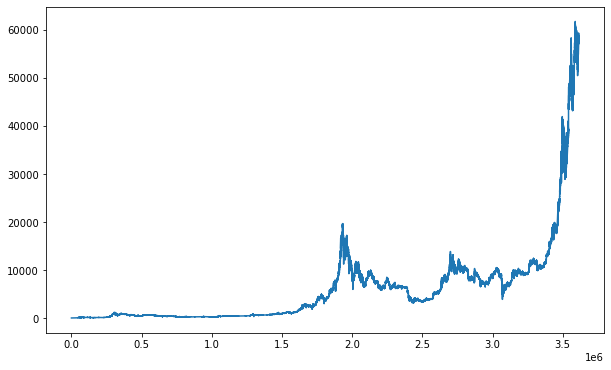

In [75]:
plt.plot(myPrice)

In [77]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition=seasonal_decompose(myPrice,freq=3)

<ipython-input-77-102f064af10c>:2: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  decomposition=seasonal_decompose(myPrice,freq=3)


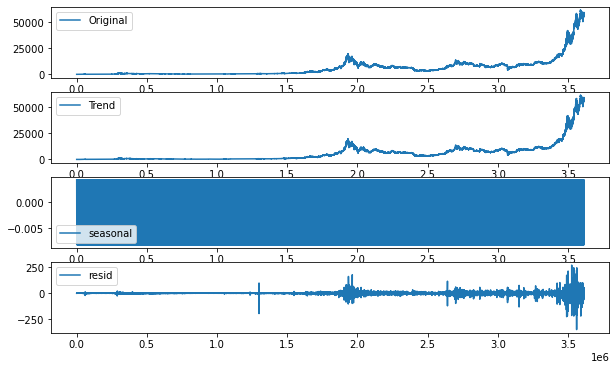

In [89]:
trend=decomposition.trend
seasonal=decomposition.seasonal
resid=decomposition.resid

plt.subplot(411)
plt.plot(myPrice,label="Original")
plt.legend(loc="best")

plt.subplot(412)
plt.plot(trend,label="Trend")
plt.legend(loc="best")

plt.subplot(413)
plt.plot(seasonal,label="seasonal")
plt.legend(loc="best")

plt.subplot(414)
plt.plot(resid,label="resid")
plt.legend(loc="best")

<AxesSubplot:>

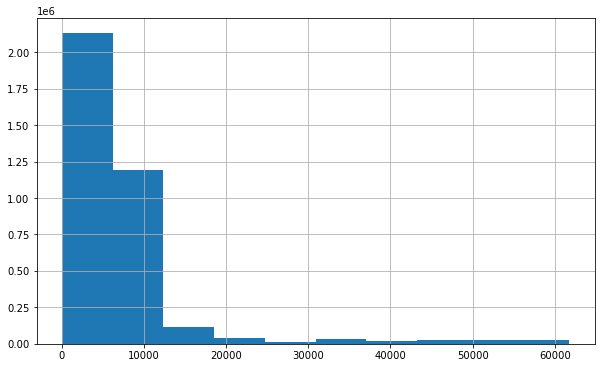

In [90]:
myPrice.hist()

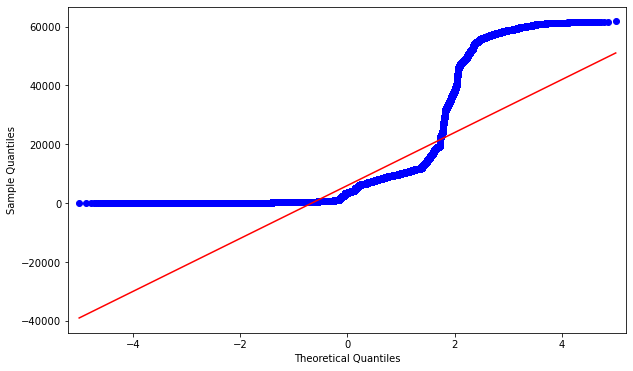

In [94]:
#q-q plot
from statsmodels.graphics.gofplots import qqplot
qqplot(myPrice,line="s")
plt.show()

Shapiro Test

In [95]:
from scipy.stats import shapiro

In [103]:
def shapiroTest(ts):
    val=shapiro(ts)
    statistic=round(val[0],3)
    pval=round(val[1],3)
    criticalVal=0.05
    if pval>criticalVal:
        print("a Gaussioan case")
    else:
        print("a non Gaussian case")

In [104]:
shapiroTest(myPrice)

a non Gaussian case


Stationarity

In [109]:
#Let us investigate if the mean and the varianne of the series change through time

def rolling_Mean_STD(timeseries):
    rolmean=timeseries.rolling(window=12).mean()
    rolstd=timeseries.rolling(window=12).std()
    
    orig=plt.plot(timeseries,color="blue",label="Original")
    mean=plt.plot(rolmean,color="red",label="Rolling Mean")
    std=plt.plot(rolstd,color="black",label="Rolling Std")
    
    plt.legend(loc="best")
    plt.title("Rolling Mean & Standard Deviation")
    plt.show(block=False)

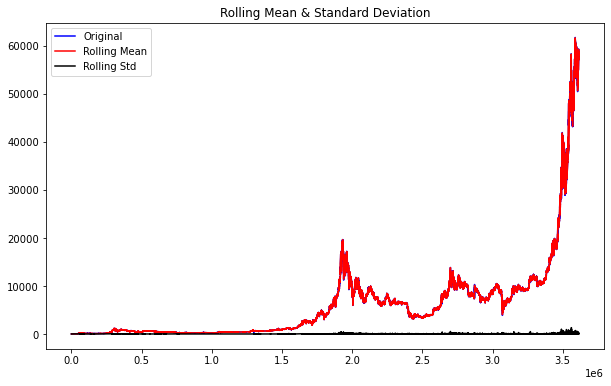

In [110]:
rolling_Mean_STD(myPrice)

In [120]:
def mean_checker(timeseries):
    thres=int(len(timeseries)/3)
    firstPart=timeseries[1:thres]
    secondPart=timeseries[(thres+1):(2*thres)]
    thirdPart=timeseries[(2*thres+1):]
    
    print("the length of the first part is",len(firstPart))
    print("the length of the secondPart part is",len(secondPart))
    print("the length of the thirdPart part is",len(thirdPart))
    
    print("-"*30)
    firstMean=firstPart.mean()
    secondMean=secondPart.mean()
    thirdMean=thirdPart.mean()
    print("-"*30)
    print('The mean of the first part is',firstMean)
    print('The mean of the second part is',secondMean)
    print('The mean of the third part is',thirdMean) 

In [121]:
mean_checker(myPrice)

the length of the first part is 1204588
the length of the secondPart part is 1204588
the length of the thirdPart part is 1204590
------------------------------
------------------------------
The mean of the first part is 356.4469634930249
The mean of the second part is 4830.121607701789
The mean of the third part is 12840.487239081584


In [123]:
#The above output shows that the mean is changing per intervals

Duckey Fuller test

In [124]:
from statsmodels.tsa.stattools import adfuller
def stationarity_test(timeseries):
    print('Results of Dickey-Fuller Test:')
    dftest=adfuller(timeseries,autolag="AIC")
    dfoutput=pd.Series(dftest[0:4],index=["Test Statistic","p-value",
                                          "#Lags Uset",
                                          "Number of Observations Used"])
    for key,value in dftest[4].items():
        dfoutput["Critical Value (%s)"%key]=value
    print(dfoutput)
    

In [ ]:
stationarity_test(myPrice)

Results of Dickey-Fuller Test:
